In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [0]:
(Xtrain,Ytrain),(Xtest,Ytest) = mnist.load_data()

In [47]:
print(Xtrain.shape,Ytrain.shape)
print(Xtest.shape,Ytest.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [0]:
def processing(X,Y):
  Y = to_categorical(Y)
  X = X.reshape((-1,28,28,1))
  X = X/255

  return (X,Y)

In [0]:
Xtrain,Ytrain = processing(Xtrain,Ytrain)
Xtest,Ytest = processing(Xtest,Ytest)

In [50]:
print(Xtrain.shape,Ytrain.shape)
print(Xtest.shape,Ytest.shape)

(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


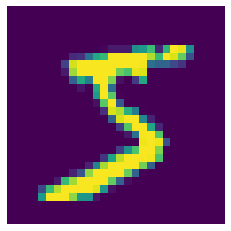

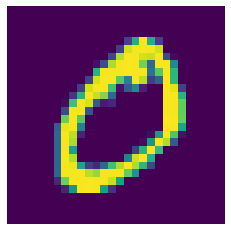

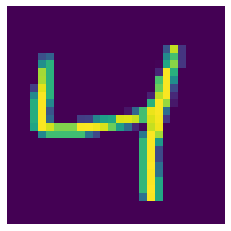

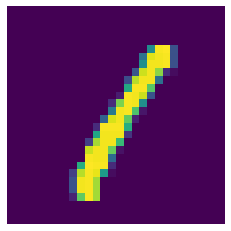

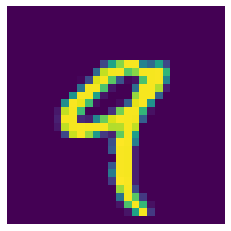

In [51]:
for i in range(5):
  plt.imshow(Xtrain[i].reshape(28,28))
  plt.axis("off")
  plt.show()

In [0]:
model = Sequential()

In [0]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [54]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 64)               

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
modelCheckPoint = ModelCheckpoint('model.h5',monitor='val_accuracy',verbose=1,save_best_only=True)
earlyStopping = EarlyStopping(monitor='val_accuracy',min_delta=0.05,patience=10,verbose=1,restore_best_weights=True)
callbacks=(modelCheckPoint,earlyStopping)

In [57]:
hist = model.fit(Xtrain,Ytrain,batch_size=256,epochs=10,validation_split=0.2,callbacks=callbacks)

Epoch 1/10
186/188 [============================>.] - ETA: 0s - loss: 0.5934 - accuracy: 0.8193
Epoch 00001: val_accuracy improved from -inf to 0.93808, saving model to model.h5
188/188 [==============================] - 1s 7ms/step - loss: 0.5893 - accuracy: 0.8201 - val_loss: 0.1947 - val_accuracy: 0.9381
Epoch 2/10
187/188 [============================>.] - ETA: 0s - loss: 0.1521 - accuracy: 0.9539
Epoch 00002: val_accuracy improved from 0.93808 to 0.96542, saving model to model.h5
188/188 [==============================] - 1s 6ms/step - loss: 0.1516 - accuracy: 0.9540 - val_loss: 0.1148 - val_accuracy: 0.9654
Epoch 3/10
188/188 [==============================] - ETA: 0s - loss: 0.1058 - accuracy: 0.9683
Epoch 00003: val_accuracy improved from 0.96542 to 0.97175, saving model to model.h5
188/188 [==============================] - 1s 6ms/step - loss: 0.1058 - accuracy: 0.9683 - val_loss: 0.0970 - val_accuracy: 0.9718
Epoch 4/10
188/188 [==============================] - ETA: 0s - los

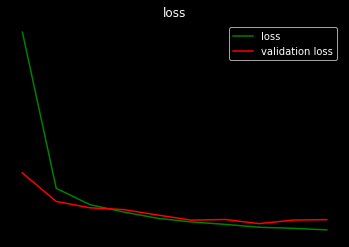

In [59]:
plt.plot(hist.history['loss'],'g',label='loss')
plt.plot(hist.history['val_loss'],'r',label='validation loss')
plt.title('loss')
plt.axis("off")
plt.legend()
plt.style.use('dark_background')
plt.show()

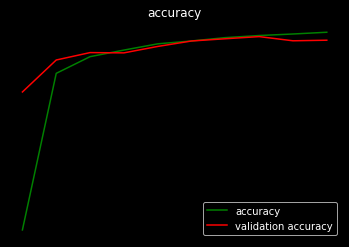

In [60]:
plt.plot(hist.history['accuracy'],'g',label='accuracy')
plt.plot(hist.history['val_accuracy'],'r',label='validation accuracy')
plt.title('accuracy')
plt.axis("off")
plt.legend()
plt.style.use('dark_background')
plt.show()

In [61]:
loss,accuracy = model.evaluate(Xtest,Ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.0668 - accuracy: 0.9790


In [62]:
print(accuracy)

0.9789999723434448
